In [36]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid
import datetime

In [2]:
alt.renderers.enable('notebook')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("../data/daily_orders.csv")

(array([42., 15., 16., 11., 27., 33., 44., 27.,  5.,  1.]),
 array([  0. ,  16.9,  33.8,  50.7,  67.6,  84.5, 101.4, 118.3, 135.2,
        152.1, 169. ]),
 <a list of 10 Patch objects>)

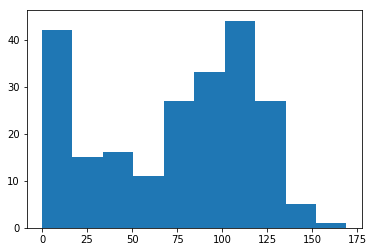

In [8]:
plt.hist(df['orders'])

In [14]:
np.percentile(df['orders'],q=20)

22.0

In [15]:
np.percentile(df['orders'],q=40)

69.0

In [16]:
np.percentile(df['orders'],q=60)

97.0

In [17]:
np.percentile(df['orders'],q=80)

113.0

In [31]:
def getQuintile(value):
    if(value < 22):
        return 0
    if(value < 69):
        return 1
    if(value < 97):
        return 2
    if(value < 113):
        return 3
    return 4
        
df['quintile']=df['orders'].apply(getQuintile).astype(int)

In [32]:
df.to_csv('../data/daily_orders_quintiles.csv')

In [43]:
df['wday'] = df['date'].apply(pd.to_datetime).dt.dayofweek

In [45]:
df['mon'] = df['date'].apply(pd.to_datetime).dt.month

In [51]:
df.tail()

,date,orders,quintile,wday,mon,week
216,2019-04-25,126,4,3,4,69
217,2019-04-26,129,4,4,4,69
218,2019-04-27,65,1,5,4,69
219,2019-04-28,1,0,6,4,69
220,2019-04-29,40,1,0,4,70


In [50]:
df['week'] = df['date'].apply(pd.to_datetime).dt.weekofyear + 52*(df['date'].apply(pd.to_datetime).dt.year - 2018)

0       75
1       29
2        0
3       78
4       81
5       85
6      101
7       68
8       27
9        0
10      68
11      53
12      67
13      82
14      76
15      41
16       0
17      76
18      87
19     104
20      88
21       0
22       0
23       0
24      87
25      80
26      73
27      75
28      85
29      31
      ... 
191      0
192    117
193    122
194    114
195    125
196    134
197     64
198      0
199    103
200    115
201    141
202    134
203    116
204     25
205      8
206     87
207     84
208     39
209      0
210      0
211      0
212      0
213    109
214    109
215    122
216    126
217    129
218     65
219      1
220     40
Name: orders, Length: 221, dtype: int64